<a href="https://colab.research.google.com/github/AhmadNass7/BIG-DATA-NLP/blob/main/Big_data_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

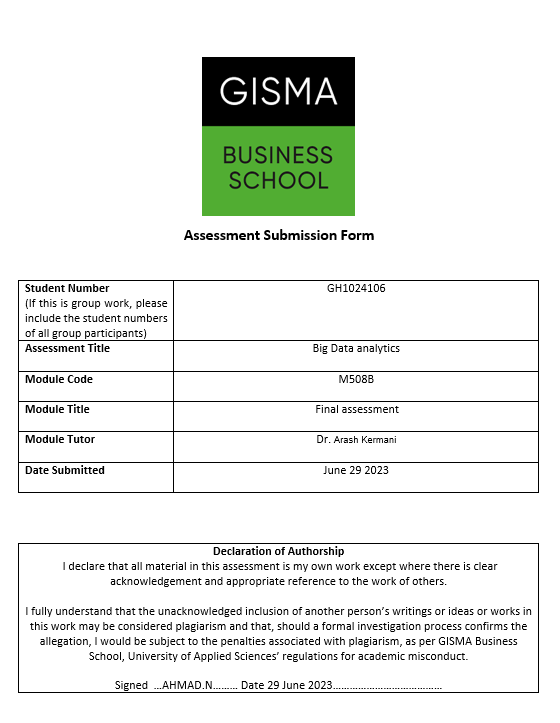

## This Assesment basically talks about the analyzation of emails that are considered as "spam" or "not spam" by using Text classification. The following Data set contains emails sent by people and our main target is to differentiate which emails are "spam " or "not spam". I implemented different algorithms to compare the accuracy and pick up the best.

## This Data set is taken from kaggle, a website that is known for Data sets.

##web-link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

## Importing The Libraries

## Importing the needed libraries to be able to run codes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as CR
import seaborn as SAV
import nltk as nk
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer





## Loading The Data Set

## Uploading our data set that basically discusses wether an email is a "spam or not a spam" , we loaded the first 5 samples.

In [ ]:
df = pd.read_csv('spamps.csv')
df.head(5)

UnicodeDecodeError: ignored

In [ ]:
df.columns



Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## Dropping the columns that are named as "unnamed" and substitute them with the folliwing columns that are named as "spam or not spam" to basically understand the data more and percieve it easily.

In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.rename({"v1":"spam or not spam","v2":"emails"},axis=1,inplace=True)
df.head(7)


,spam or not spam,emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...


## Implementing the following code to check if the data is balanced or not. It is obviously seen that this data set is kindly imbalanced containing 4825 as "not spam/ham" emails and 747 as "spam emails".

In [ ]:
df["spam or not spam"].value_counts()

ham     4825
spam     747
Name: spam or not spam, dtype: int64

## Implementing a popular code named as "Under sampling" to reduce the samples of classes and make them balanced again since imbalanced data can affect the performance of the pipeline.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd


X = df.drop('emails', axis=1)
y = df['spam or not spam']


random_sampling = RandomUnderSampler(random_state=25)
X_resampled, y_resampled = random_sampling.fit_resample(X, y)


print(pd.Series(y_resampled).value_counts())

ham     747
spam    747
Name: spam or not spam, dtype: int64


## Checking for missed values to make sure that our data is cleaned to be able to analyze and conclude it effectively, and it seems that our data is clean since it gave 0 missing values.

In [ ]:
print(df.isnull().sum())

spam or not spam    0
emails              0
dtype: int64


## Implenting a bar graph to visualize it, and it shows that emails that are not named as "spam or not spam" are way more than spam emails in the given data set.

<ipython-input-9-cf911c9ca26b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


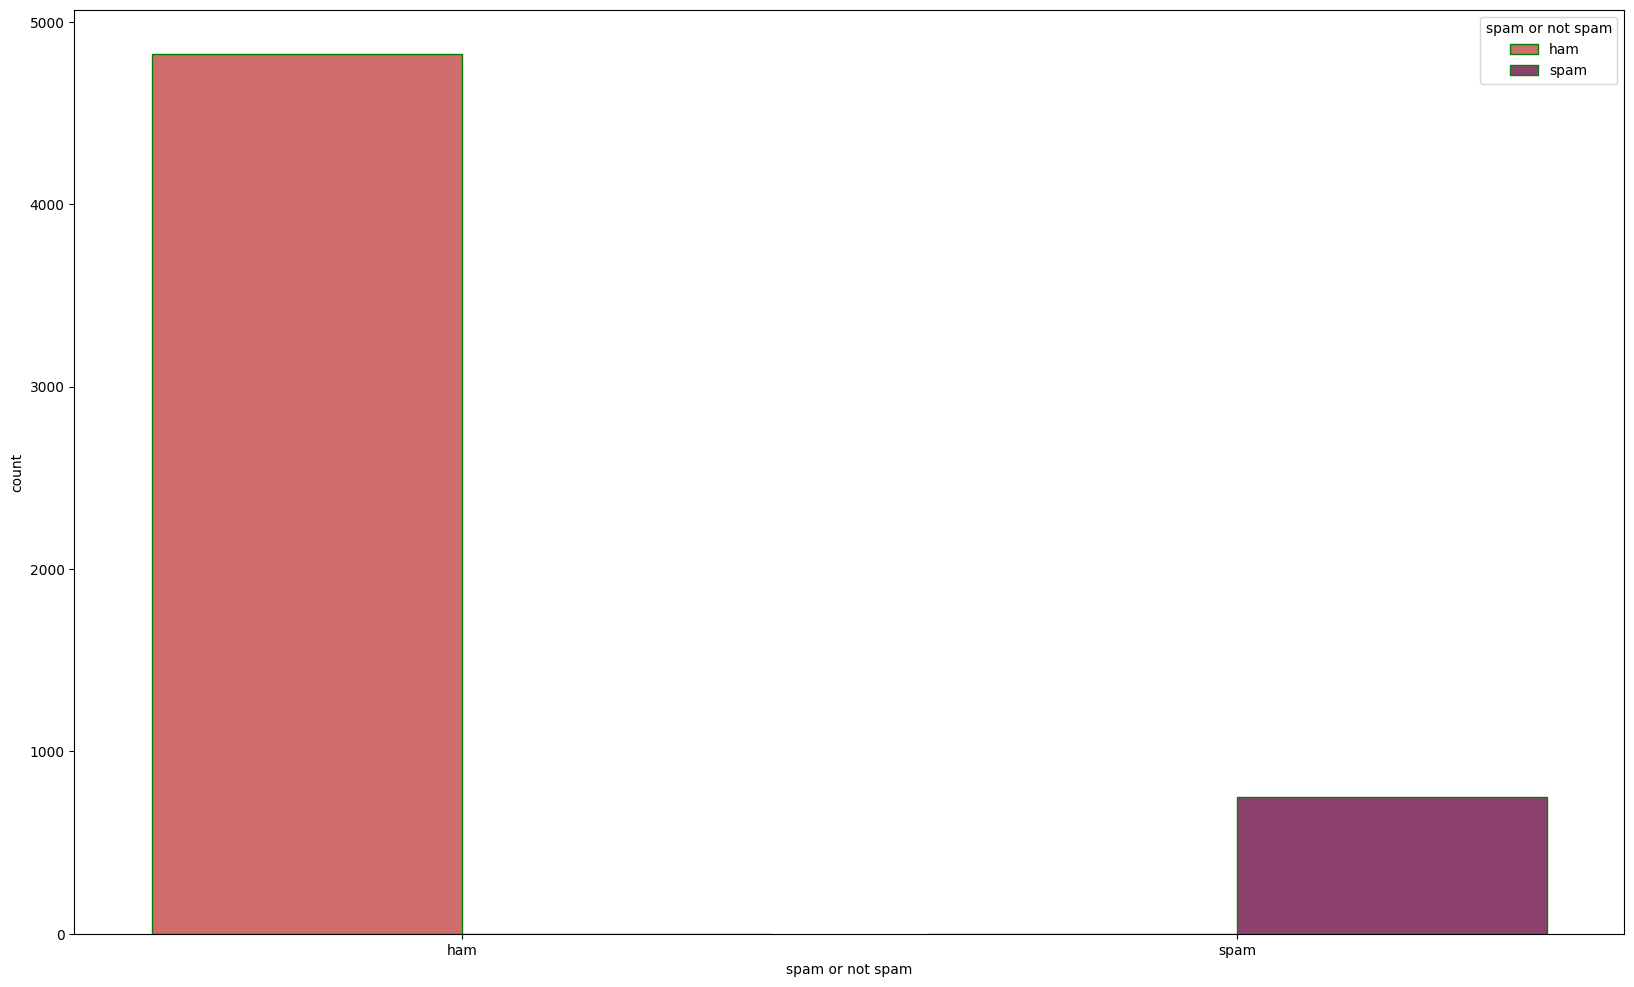

In [ ]:
df.corr()
CR.figure(figsize=(20,12))
SAV.countplot(data=df, x='spam or not spam',  hue='spam or not spam',palette='flare',edgecolor="green")

CR.show()

## Its important to change the target as numerical values(0 and 1) to be able for the since machine learning pipelines are used to understand the following data set as numerical values to gain better performance and reliable analysis.

In [ ]:
df['spam'] = df['spam or not spam'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head(7)

,spam or not spam,emails,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
6,ham,Even my brother is not like to speak with me. ...,0,77


## Here we added a column named " length" basically for text processing because with length can give a better interpretation/analyzation of this data set by linking emails and length.

In [ ]:
df['length'] = df['emails'].str.len()
df.head(7)

,spam or not spam,emails,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
6,ham,Even my brother is not like to speak with me. ...,0,77


In [ ]:
spam_lengths = df[df['emails'] == 'spam']['length']
not_spam_lengths = df[df['emails'] == 'ham']['length']








In [ ]:
df.describe()


,spam,length
count,5572.000000,5572.000000
mean,0.134063,80.118808
std,0.340751,59.690841
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,61.000000
75%,0.000000,121.000000
max,1.000000,910.000000


In [ ]:
corpus=[]
stemmer=PorterStemmer()


## Implementing NLTK RESOURCES.


In [ ]:
nk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

## Text preprocessing: Here it is basically used by removing non words and converting them into lower , tokenization that enhance  suffient analysis, which definetly will improve the quality of the data set and obtaining better results.

In [ ]:
for emails in df['emails']:

    emails = re.sub(r'[^a-zA-Z]', ' ', emails).lower()


    words_tokenization = emails.split()


    stemmed_words = [stemmer.stem(word) for word in words_tokenization if word not in stopwords.words("english")]


    emails = ' '.join(stemmed_words)


    corpus.append(emails)

In [ ]:
corpus[7]

'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun'

In [ ]:
AN,AN.shape
### giving 5572 rows and 6221 columns

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 (5572, 6221))

In [ ]:
df["emails"].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

## Splitting the Data Set into training and testing by seperating its features from its target(spam or not spam) by trying to understand what is the model predicting here.This can be answered by conducting the main purpose of this data set is to see which emails are considered as "spam or not spam".

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["emails"], df["spam or not spam"], test_size=0.2)


print("X_train size:",X_train.shape)
print("x_test size:",X_test.shape)
print("y_train size:",y_train.shape)
print("y_test size:",y_test.shape)

X_train size: (4457,)
x_test size: (1115,)
y_train size: (4457,)
y_test size: (1115,)


In [ ]:
X= df['emails'].values
y = df['spam or not spam'].values


## Implementing Naive Bayes classifier using the TF-IDf method, tfidf plays an important role by taking into consideration the frequency of the words and the importance in the corpus.By implementing the Naive Bayes classifier it gave an accuracy of 97%.

In [ ]:
tfidf_vectorizer_1= TfidfVectorizer(stop_words='english')
X_train_tfidf= tfidf_vectorizer_1.fit_transform(X_train)
X_test_tfidf= tfidf_vectorizer_1.transform(X_test)

naive_bayes_model=MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

y_predicted= naive_bayes_model.predict(X_test_tfidf)

print('Accuracy', accuracy_score(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_test,y_predicted))

Accuracy 0.9713004484304932
Confusion matrix:
 [[976   0]
 [ 32 107]]


In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['emails'])
y = df['spam or not spam']

## The overall output of this algorthims states how we used tfidf vectorization and the Naive Bayer classifier by implementing the hyper parameters of the tfidf, by doing so it makes it easier to train and analyze our model. In conclusion, it gave us an accuracy of 95%

In [ ]:
pipeline_model= Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',MultinomialNB())
])


parameters_tfidf= {'tfidf__ngram_range': [(1,1),(1,2),(1,3)], 'tfidf__max_df':(0.5,0.75,1)}

parameters_grid_search=GridSearchCV(pipeline_model, parameters_tfidf, cv=5, n_jobs=-1, verbose=1)
parameters_grid_search.fit(X_train, y_train)

print("The best score of our tunned model is",parameters_grid_search.best_score_)
print("The best score of our tunned model is",parameters_grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best score of our tunned model is 0.9544548625266114
The best score of our tunned model is {'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 1)}


## Implementing logistci regression and getting an accuracy of 96%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["emails"], df["spam or not spam"], test_size=0.2)


vect = TfidfVectorizer(max_features=5000)


X_train = vect.fit_transform(X_train).toarray()


X_test = vect.transform(X_test).toarray()


classifier = LogisticRegression()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9695067264573991


## By implementing tfidf on the classifer of "svm" method it gave 98%.

In [ ]:



X_train, X_test, y_train, y_test = train_test_split(df["emails"], df["spam or not spam"], test_size=0.2)


vec_2 = TfidfVectorizer(max_features=5000)


X_train = vec_2.fit_transform(X_train).toarray()

X_test = vec_2.transform(X_test).toarray()


classifier_svm= SVC()
classifier_svm.fit(X_train, y_train)


y_pred = classifier_svm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9874439461883409


## In conclusion, as we mentioned before our main target in this assesment is to validate and check which emails are considered as spam or not spam , by implemeting the methods and algorthims of text classification. It is shown that after implementing the stated algorthims , svm gave the highest accuracy among all obtaining an accuracy of 98%.

In [ ]:
!jupyter nbconvert --to html nlp.ipynb

[NbConvertApp] Converting notebook nlp.ipynb to html
[NbConvertApp] Writing 753189 bytes to nlp.html
